<a href="https://colab.research.google.com/github/Himna2003/Machine-Learning/blob/main/Copy_of_Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('English-Pakistan-news-dataset.csv')
data.head()

,URL,Title,Text,Review Date,Textual Rating,Publisher Site,Publisher Name,Claim Date,Claimant,Content,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,https://factcheck.afp.com/satirical-claim-abou...,NaN,Pakistan passes law making two marriages for m...,2021-01-12T11:55:00Z,Satire,factcheck.afp.com,AFP Fact Check,2020-11-05T00:00:00Z,Multiple Sources,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://thelogicalindian.com/fact-check/balako...,NaN,Ex Pakistani diplomat in a debate accepted tha...,2021-01-11T11:19:26Z,False,thelogicalindian.com,The Logical Indian,2021-01-11T11:19:26Z,Social Media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.altnews.in/indian-media-falsely-cl...,Indian media falsely claims ex-Pak diplomat ad...,Former Pakistani diplomat Zafar Hilaly admitte...,2021-01-10T00:00:00Z,False,altnews.in,Alt News,2016-06-20T00:00:00Z,"ANI, Republic, Times of India, Livemint, ABP N...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boomlive.in/fact-check/fact-check-...,"ANI, News Outlets Falsely Claim Ex Pak Diploma...",Former Pak diplomat admits 300 casualties in B...,2021-01-10T11:38:27Z,False,boomlive.in,BOOM FACT Check,2021-01-10T11:38:27Z,"ANI, Republic TV, CNN News 18, NE Now, Livemin...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boomlive.in/fact-check/fake-news-f...,Dawn Screenshot Claiming Pakistani Pilot Urina...,Photo shows Dawn article on Pakistan pilot uri...,2021-01-04T08:41:24Z,False,boomlive.in,BOOM FACT Check,2021-01-04T08:41:24Z,Facebook Posts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['URL', 'Title', 'Text', 'Review Date', 'Textual Rating',
       'Publisher Site', 'Publisher Name', 'Claim Date', 'Claimant', 'Content',
       'Published At', 'Author', 'Url to Image', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
data = data.drop(['URL', 'Claimant','Claim Date','Author', 'Url to Image', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [ ]:
data.columns

Index(['Title', 'Text', 'Review Date', 'Textual Rating', 'Publisher Site',
       'Publisher Name', 'Content', 'Published At'],
      dtype='object')

In [ ]:
data = data.drop(['Content', 'Publisher Site'], axis=1)

In [ ]:
data['Textual Rating'] = data['Textual Rating'].map({'False':0, 'True':1, 'Misleading':0, 'Half true':1, 'Satire':0,'Mostly false':0,
                                                     'Fake':0})

In [ ]:
data.head()

,Title,Text,Review Date,Textual Rating,Publisher Name,Published At
0,NaN,Pakistan passes law making two marriages for m...,2021-01-12T11:55:00Z,0.0,AFP Fact Check,NaN
1,NaN,Ex Pakistani diplomat in a debate accepted tha...,2021-01-11T11:19:26Z,0.0,The Logical Indian,NaN
2,Indian media falsely claims ex-Pak diplomat ad...,Former Pakistani diplomat Zafar Hilaly admitte...,2021-01-10T00:00:00Z,0.0,Alt News,NaN
3,"ANI, News Outlets Falsely Claim Ex Pak Diploma...",Former Pak diplomat admits 300 casualties in B...,2021-01-10T11:38:27Z,0.0,BOOM FACT Check,NaN
4,Dawn Screenshot Claiming Pakistani Pilot Urina...,Photo shows Dawn article on Pakistan pilot uri...,2021-01-04T08:41:24Z,0.0,BOOM FACT Check,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Review Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Publisher Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Review Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Review Date'}, axis=1)
              .sort_values('Review Date', ascending=True))
  xs = counted['Review Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Review Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Review Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Review Date'}, axis=1)
              .sort_values('Review Date', ascending=True))
  xs = counted['Review Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Review Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Review Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Review Date'}, axis=1)
              .sort_values('Review Date', ascending=True))
  xs = counted['Review Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Review Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Review Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Review Date'}, axis=1)
              .sort_values('Review Date', ascending=True))
  xs = counted['Review Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Review Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Publisher Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Publisher Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Text'].value_counts()
    for x_label, grp in _df_8.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('Text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review Date'].value_counts()
    for x_label, grp in _df_9.groupby('Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Text')
_ = plt.ylabel('Review Date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Publisher Name'].value_counts()
    for x_label, grp in _df_10.groupby('Review Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review Date')
_ = plt.ylabel('Publisher Name')

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = data.apply(lambda x: x.astype(str).str.lower())
print(data.head())

                                               Title  \
0                                                nan   
1                                                nan   
2  indian media falsely claims ex-pak diplomat ad...   
3  ani, news outlets falsely claim ex pak diploma...   
4  dawn screenshot claiming pakistani pilot urina...   

                                                Text           Review Date  \
0  pakistan passes law making two marriages for m...  2021-01-12t11:55:00z   
1  ex pakistani diplomat in a debate accepted tha...  2021-01-11t11:19:26z   
2  former pakistani diplomat zafar hilaly admitte...  2021-01-10t00:00:00z   
3  former pak diplomat admits 300 casualties in b...  2021-01-10t11:38:27z   
4  photo shows dawn article on pakistan pilot uri...  2021-01-04t08:41:24z   

  Textual Rating      Publisher Name Published At  
0            0.0      afp fact check          nan  
1            0.0  the logical indian          nan  
2            0.0            alt news  

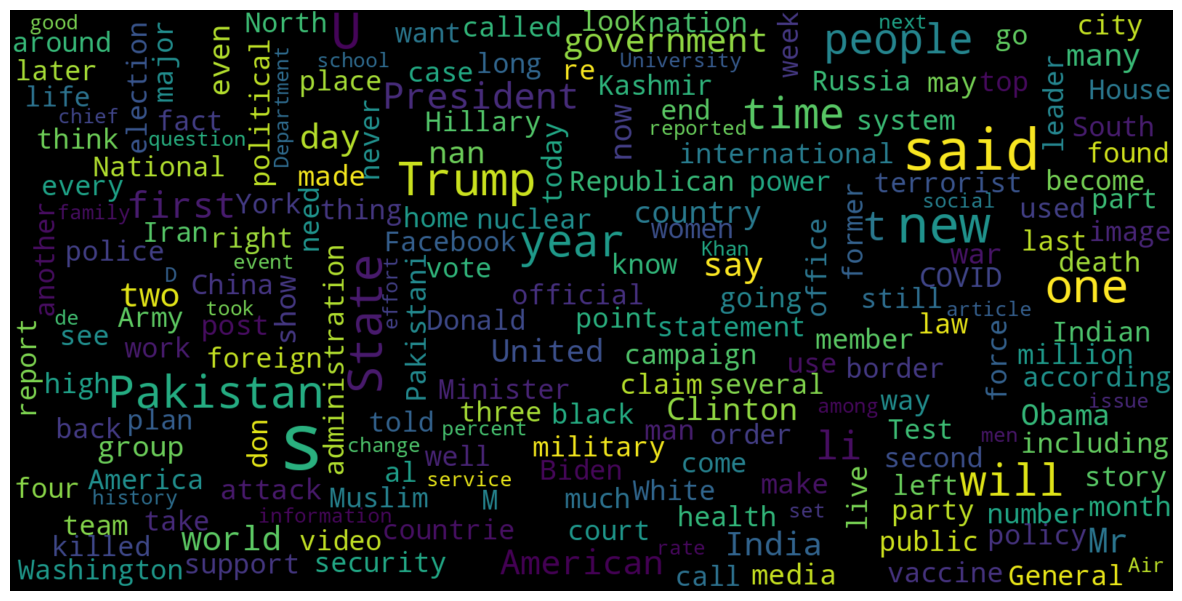

In [ ]:

consolidated = ' '.join(
	word for word in data['Text'].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['Text'], data['Textual Rating'], test_size=0.25)


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
x_train.fillna("", inplace=True)
x_test.fillna("", inplace=True)

vectorization = TfidfVectorizer()
x_train_vector = vectorization.fit_transform(x_train)
x_test_vector = vectorization.transform(x_test)


In [ ]:
y_train.fillna("", inplace=True)
y_test.fillna("", inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train = [str(label) for label in y_train]
y_test = [str(label) for label in y_test]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_vector, y_train_encoded)


LogisticRegression()

In [ ]:
model.score(x_test_vector, y_test_encoded)

0.8801520023384976